In [5]:
import dataset
from pathlib import Path
from dotenv import load_dotenv
import os
import numpy as np
import csv
import pandas as pd


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


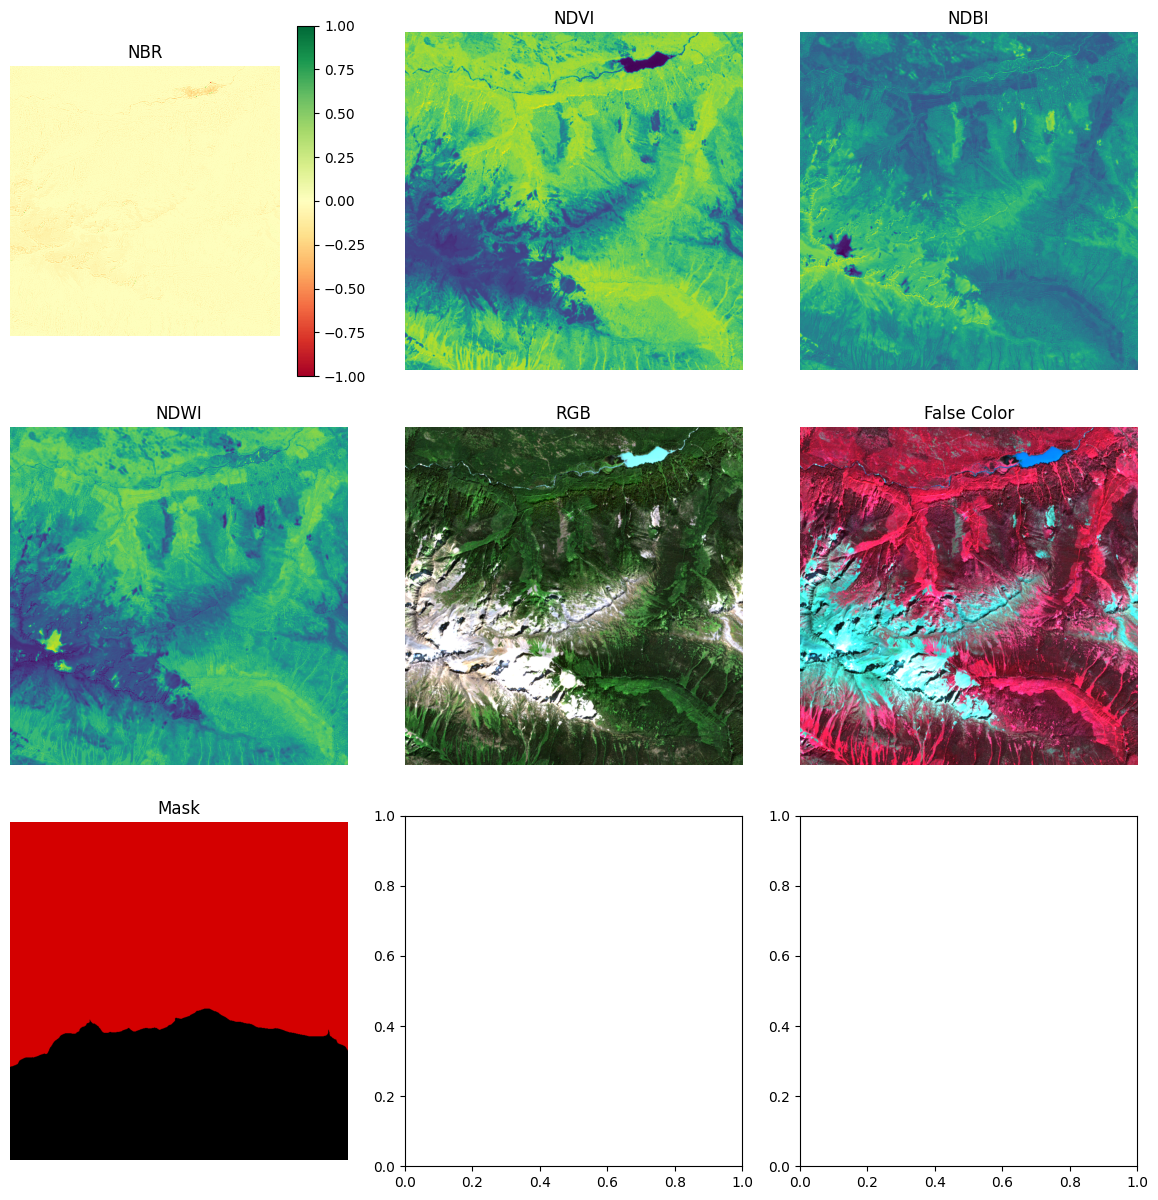

In [29]:
load_dotenv()

data_path = Path(os.getenv("prepare_dataset_folder"))
split = "train"  # or 'val' or 'test', depending on your dataset_splits.csv

# Instantiate the dataset
forest_sat_dataset = dataset.MineSATDataset(split=split, data_path=data_path)

index = 10 # max 1343

# Display the transformed images including NBR and NDVI
forest_sat_dataset.display_transformed_images(index)


In [7]:
def save_numerical_values_to_csv(numerical_values, csv_filename):
    ndvi = numerical_values["NDVI"]
    nbr = numerical_values["NBR"]
    location = numerical_values["Location"].replace("image_directory_", "")

    # Stack NDVI and NBR arrays
    stacked_data = np.dstack((ndvi, nbr))

    # Reshape the array to 2D
    reshaped_data = stacked_data.reshape(-1, 2)

    # Convert each row to a string representation
    combined_data_as_strings = ["[" + ", ".join(map(str, row)) + "]" for row in reshaped_data]

    # Join all string representations to form a single string representing the 2D array
    final_data_string = "[" + ", ".join(combined_data_as_strings) + "]"

    # Write to CSV
    with open(csv_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Index', 'NDVI_NBR'])
        writer.writerow([location, final_data_string])


In [30]:
numerical_values = forest_sat_dataset.get_numerical_values(index)
# print(numerical_values)
# save_numerical_values_to_csv(numerical_values, "/Users/junyulyu/Desktop/Capstone/Useroutput.csv")
# save_numerical_values_to_csv(numerical_values, Path(os.environ.get('data_csv_path')))


Filepath: image_directory_20230813_110
Location info: image_directory_20230813_110


In [37]:
import re
def write_row(numerical_values, writer):
    ndvi = re.sub(' +', ',',str(numerical_values["NDVI"]))
    nbr = re.sub(' +', ',',str(numerical_values["NBR"]))
    location = str(numerical_values["Location"].replace("image_directory_", ""))

    writer.writerow([location, ndvi, nbr])



In [17]:
def write_data(index_range, csv_filename):
    with open(csv_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Index', 'NDVI', 'NBR'])
        for i in range(index_range):
            numerical_values = forest_sat_dataset.get_numerical_values(i)
            print(numerical_values)
            write_row(numerical_values, writer)

            if i == 10:
                break


In [38]:
write_data(15, Path(os.environ.get('data_csv_path')))


Filepath: image_directory_20230813_100
Location info: image_directory_20230813_100
{'NDVI': array([[ 0.77556938,  0.81093205,  0.85152178, ..., -0.12528818,
        -0.14034982, -0.15317029],
       [ 0.76606772,  0.7904876 ,  0.86468822, ..., -0.00613448,
        -0.1282146 , -0.1578695 ],
       [ 0.81366469,  0.84722694,  0.83610194, ...,  0.05274243,
        -0.07529646, -0.11037762],
       ...,
       [-0.16453895, -0.02017484, -0.13331383, ...,  0.58829831,
         0.45522409,  0.54131086],
       [-0.13453045, -0.15479604, -0.12973092, ...,  0.57094199,
         0.20961677,  0.10375636],
       [ 0.01683259, -0.01017973, -0.01120464, ...,  0.5076487 ,
         0.07962769, -0.07167893]]), 'NBR': array([[ 0.00307883,  0.04981284,  0.03940431, ...,  0.03910847,
        -0.10319851,  0.09908416],
       [-0.06948774, -0.02577777,  0.17579458, ..., -0.07693177,
        -0.08823146, -0.05039194],
       [ 0.05474474,  0.13793356,  0.00983092, ...,  0.01150692,
        -0.02459326, -